# Encoding de las variables Categoricas.

```revisar imports al final del todo en caso de no estarse usando```

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Vigilar progreso bucles
# -----------------------------------------------------------------------
from tqdm import tqdm

# Gestionar los warnings
# -----------------------------------------------------------------------
import warnings

# modificar el path
# -----------------------------------------------------------------------
import sys
sys.path.append("../..")

# importar funciones de soporte
# -----------------------------------------------------------------------
from src import soporte_preprocesamiento as sup_prep
from src import soporte_nulos as sup_nul
from src import soporte_encoding as sup_encod


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

##aplicar configuraciones
#------------------------------------------------------------------------
warnings.filterwarnings('ignore')
pd.set_option('display.max_info_columns', 50)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format) #eliminamos la notacion cientifica

tqdm.pandas()

---
---

## Importamos nuestros datos tratados en el notebook ```2_Estandarizacion.ipynb```.

In [2]:
df = pd.read_csv('../../datos/datos_modelo1/tratados/escalados_propiedades_provincia_madrid.csv', index_col=0).reset_index(drop=True)
df.sample()

,numPhotos,price,propertyType,size,exterior,rooms,bathrooms,municipality,showAddress,distance,hasVideo,status,newDevelopment,hasPlan,has3DTour,has360,topNewDevelopment,floor,district,neighborhood,hasLift
70,0.00,750.00,flat,0.32,True,0.00,0.00,Madrid,False,-0.32,False,good,False,False,False,False,False,Desconocido,Ciudad Lineal,Pueblo Nuevo,True


## Vemos la distribucion de nuestras categoricas

In [3]:
visualizador = sup_prep.Visualizador(df)

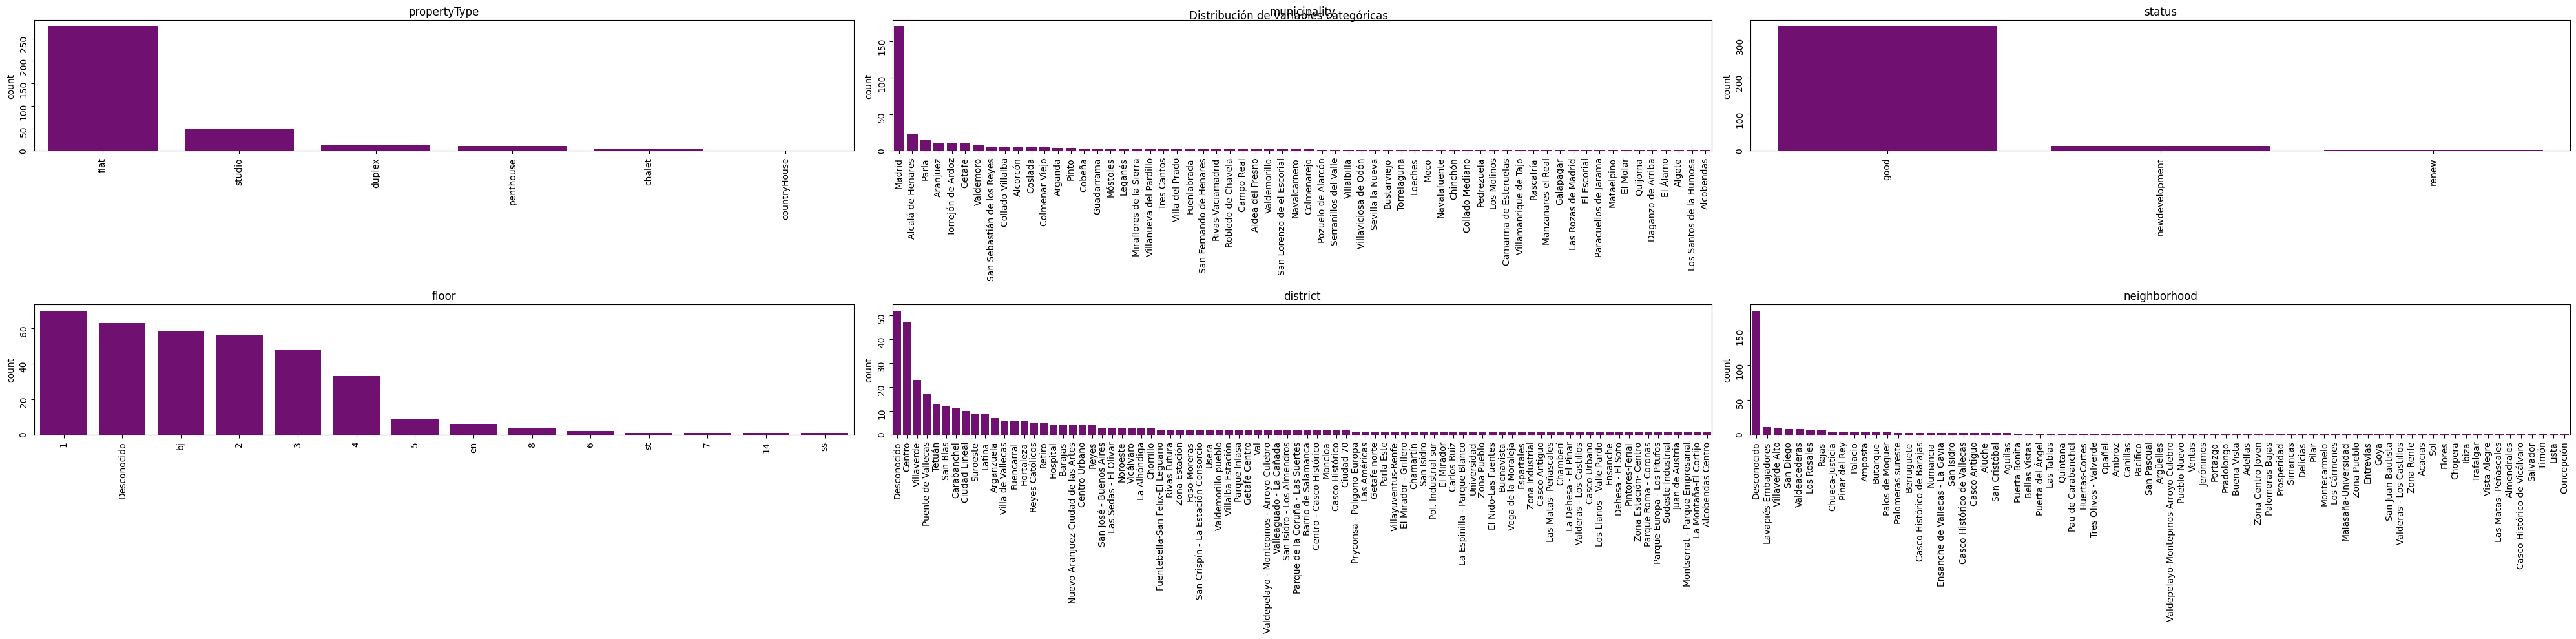

In [4]:
visualizador.plot_categoricas(color='purple')

## Visualizamos la relacion de las categoricas con nuestra VR que es 'price'

<h3 style="color: #9966CC"><b>
Introducir toda la parte de los tests para ver si mis variobles tienen orden o no
</b></h3>

In [5]:
df.select_dtypes('O').sample()

,propertyType,municipality,status,floor,district,neighborhood
2,penthouse,Villamanrique de Tajo,good,2,Desconocido,Desconocido


In [6]:
dict_encoding = {"onehot": ['propertyType', 'status', 'floor' ], 
                        "dummies": [], # no metemos ninguna
                        'ordinal' : { }, #no metemos ninguna
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": [], # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": ['municipality', 'district', 'neighborhood']  #con orden
                        }

In [7]:
encoding = sup_encod.Encoding(dataframe=df, diccionario_encoding=dict_encoding, variable_respuesta='price')
df_encoded = encoding.one_hot_encoding()
df_encoded = encoding.target_encoding()
df_encoded.sample(3)

,numPhotos,price,propertyType,size,exterior,rooms,bathrooms,municipality,showAddress,distance,hasVideo,status,newDevelopment,hasPlan,has3DTour,has360,topNewDevelopment,floor,district,neighborhood,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,status_good,status_newdevelopment,status_renew,floor_1,floor_14,floor_2,floor_3,floor_4,floor_5,floor_6,floor_7,floor_8,floor_Desconocido,floor_bj,floor_en,floor_ss,floor_st
20,-0.85,695.00,flat,-0.68,False,-1.00,0.00,705.59,False,-0.48,False,good,False,True,False,False,False,4,697.13,693.20,True,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
311,0.23,650.00,flat,1.12,True,0.00,0.00,688.87,True,1.47,True,good,False,False,False,False,False,2,645.66,679.79,False,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
299,-0.08,600.00,flat,-1.16,False,-1.00,0.00,705.59,True,-0.38,True,good,False,False,False,False,False,4,689.15,690.39,False,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Eliminamos las columnas originales las cuales hemos encodeado mediante 'One-Hot-Encoding'.

In [8]:
df_encoded.drop(columns=['propertyType', 'status', 'floor' ], inplace=True)

## Salvamos los datos

In [9]:
df_encoded.to_csv('../../datos/datos_modelo1/tratados/encoded_propiedades_provincia_madrid.csv')